In [ ]:
!pip install pandas numpy faker


In [ ]:
!pip install pyspark


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta

fake = Faker()

In [ ]:
# CONFIG
# ------------------------------
NUM_CUSTOMERS = 20000
NUM_CDR = 50000
NUM_COMPLAINTS = 8000
NUM_NETWORK = 10000

locations = ["Kathmandu", "Lalitpur", "Bhaktapur", "Pokhara", "Biratnagar", "Butwal", "Dharan"]
service_plans = ["Basic", "Standard", "Premium"]
network_types = ["4G", "5G", "VoLTE"]
call_types = ["incoming", "outgoing"]
complaint_types = ["Network Issue", "Billing Issue", "Slow Internet", "Dropped Calls", "Other"]

In [ ]:
# 1️⃣ CUSTOMER DATASET
# ------------------------------
customers = {
    "customer_id": [fake.unique.random_int(100000, 999999) for _ in range(NUM_CUSTOMERS)],
    "location": [random.choice(locations) for _ in range(NUM_CUSTOMERS)],
    "service_plan": [random.choice(service_plans) for _ in range(NUM_CUSTOMERS)],
    "data_usage": [round(random.uniform(0.1, 10.0),2) for _ in range(NUM_CUSTOMERS)],
    "call_duration": [fake.random_int(10,600) for _ in range(NUM_CUSTOMERS)],
    "complaints": [fake.random_int(0,5) for _ in range(NUM_CUSTOMERS)],
    "churn": [fake.random_int(0,1) for _ in range(NUM_CUSTOMERS)]
}

df_customers = pd.DataFrame(customers)

In [ ]:
# 2️⃣ CDR DATASET
# ------------------------------
cdr = {
    "record_id": list(range(1, NUM_CDR+1)),
    "customer_id": [random.choice(df_customers["customer_id"]) for _ in range(NUM_CDR)],
    "timestamp": [fake.date_time_between(start_date="-1y", end_date="now") for _ in range(NUM_CDR)],
    "call_type": [random.choice(call_types) for _ in range(NUM_CDR)],
    "call_duration_seconds": [fake.random_int(1, 800) for _ in range(NUM_CDR)],
    "called_number": [fake.random_int(9800000000, 9899999999) for _ in range(NUM_CDR)],
    "call_cost": [round(random.uniform(0.1, 2.0), 4) for _ in range(NUM_CDR)],
    "tower_id": [f"TWR{fake.random_int(1000,9999)}" for _ in range(NUM_CDR)],
    "network": [random.choice(network_types) for _ in range(NUM_CDR)]
}

df_cdr = pd.DataFrame(cdr)


In [ ]:
# 3️⃣ COMPLAINT LOGS DATASET
# ------------------------------
complaints = {
    "complaint_id": list(range(1, NUM_COMPLAINTS+1)),
    "customer_id": [random.choice(df_customers["customer_id"]) for _ in range(NUM_COMPLAINTS)],
    "timestamp": [fake.date_time_between(start_date="-1y", end_date="now") for _ in range(NUM_COMPLAINTS)],
    "category": [random.choice(complaint_types) for _ in range(NUM_COMPLAINTS)],
    "resolved": [random.choice([0, 1]) for _ in range(NUM_COMPLAINTS)]
}

df_complaints = pd.DataFrame(complaints)

In [ ]:
# 4️⃣ NETWORK USAGE DATASET
# ------------------------------
network_usage = {
    "tower_id": [f"TWR{fake.random_int(1000,9999)}" for _ in range(NUM_NETWORK)],
    "timestamp": [fake.date_time_between(start_date="-30d", end_date="now") for _ in range(NUM_NETWORK)],
    "data_load_MB": [round(random.uniform(100, 5000), 2) for _ in range(NUM_NETWORK)],
    "active_users": [fake.random_int(10, 500) for _ in range(NUM_NETWORK)],
    "network_type": [random.choice(network_types) for _ in range(NUM_NETWORK)]
}

df_network = pd.DataFrame(network_usage)

In [ ]:
# SAVE TO CSV
# ------------------------------
df_customers.to_csv("customers.csv", index=False)
df_cdr.to_csv("cdr.csv", index=False)
df_complaints.to_csv("complaints.csv", index=False)
df_network.to_csv("network_usage.csv", index=False)

df_customers.head(), df_cdr.head(), df_complaints.head(), df_network.head()

(   customer_id    location service_plan  data_usage  call_duration  \
 0       986083   Kathmandu      Premium        3.90             60   
 1       103565      Dharan        Basic        9.18            315   
 2       151588     Pokhara     Standard        5.37            462   
 3       428243    Lalitpur        Basic        6.88            554   
 4       517690  Biratnagar     Standard        4.76            456   
 
    complaints  churn  
 0           5      1  
 1           3      1  
 2           1      0  
 3           2      0  
 4           5      0  ,
    record_id  customer_id                  timestamp call_type  \
 0          1       218192 2025-07-12 07:10:55.861363  incoming   
 1          2       165229 2025-03-13 22:44:00.373626  outgoing   
 2          3       743553 2025-09-06 22:57:23.806786  outgoing   
 3          4       783506 2025-07-13 04:05:08.138728  outgoing   
 4          5       195845 2025-03-11 12:49:53.698500  incoming   
 
    call_duration_secon

In [ ]:
# View columns only
print("DF1 Columns:", df_customers.columns.tolist())
print("DF2 Columns:", df_cdr.columns.tolist())
print("DF3 Columns:", df_complaints.columns.tolist())
print("DF4 Columns:", df_network.columns.tolist())

# View schema (column name + datatype + non-null info)
print("\nDF1 Info:")
df_customers.info()
print("\nDF2 Info:")
df_cdr.info()
print("\nDF3 Info:")
df_complaints.info()
print("\nDF4 Info:")
df_network.info()


DF1 Columns: ['customer_id', 'location', 'service_plan', 'data_usage', 'call_duration', 'complaints', 'churn']
DF2 Columns: ['record_id', 'customer_id', 'timestamp', 'call_type', 'call_duration_seconds', 'called_number', 'call_cost', 'tower_id', 'network']
DF3 Columns: ['complaint_id', 'customer_id', 'timestamp', 'category', 'resolved']
DF4 Columns: ['tower_id', 'timestamp', 'data_load_MB', 'active_users', 'network_type']

DF1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    20000 non-null  int64  
 1   location       20000 non-null  object 
 2   service_plan   20000 non-null  object 
 3   data_usage     20000 non-null  float64
 4   call_duration  20000 non-null  int64  
 5   complaints     20000 non-null  int64  
 6   churn          20000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.1+ 

In [ ]:
from google.colab import files

files.download("customers.csv")
files.download("cdr.csv")
files.download("complaints.csv")
files.download("network_usage.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, isnan

In [ ]:
# 1️⃣ Create Spark Session
spark = SparkSession.builder \
    .appName("TelecomDataCleaning") \
    .master("local[*]") \
    .getOrCreate()

In [ ]:
# 2️⃣ Load CSVs into DataFrames
df_customers = spark.read.csv("customers.csv", header=True, inferSchema=True)
df_cdr = spark.read.csv("cdr.csv", header=True, inferSchema=True)
df_complaints = spark.read.csv("complaints.csv", header=True, inferSchema=True)
df_network = spark.read.csv("network_usage.csv", header=True, inferSchema=True)

In [ ]:
# 3️⃣ Check schema & basic stats
print("=== Customers Schema ===")
df_customers.printSchema()
df_customers.show(5)


=== Customers Schema ===
root
 |-- customer_id: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- service_plan: string (nullable = true)
 |-- data_usage: double (nullable = true)
 |-- call_duration: integer (nullable = true)
 |-- complaints: integer (nullable = true)
 |-- churn: integer (nullable = true)

+-----------+----------+------------+----------+-------------+----------+-----+
|customer_id|  location|service_plan|data_usage|call_duration|complaints|churn|
+-----------+----------+------------+----------+-------------+----------+-----+
|     986083| Kathmandu|     Premium|       3.9|           60|         5|    1|
|     103565|    Dharan|       Basic|      9.18|          315|         3|    1|
|     151588|   Pokhara|    Standard|      5.37|          462|         1|    0|
|     428243|  Lalitpur|       Basic|      6.88|          554|         2|    0|
|     517690|Biratnagar|    Standard|      4.76|          456|         5|    0|
+-----------+----------+--------

In [ ]:
print("=== CDR Schema ===")
df_cdr.printSchema()
df_cdr.show(5)

=== CDR Schema ===
root
 |-- record_id: integer (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- call_type: string (nullable = true)
 |-- call_duration_seconds: integer (nullable = true)
 |-- called_number: long (nullable = true)
 |-- call_cost: double (nullable = true)
 |-- tower_id: string (nullable = true)
 |-- network: string (nullable = true)

+---------+-----------+--------------------+---------+---------------------+-------------+---------+--------+-------+
|record_id|customer_id|           timestamp|call_type|call_duration_seconds|called_number|call_cost|tower_id|network|
+---------+-----------+--------------------+---------+---------------------+-------------+---------+--------+-------+
|        1|     218192|2025-07-12 07:10:...| incoming|                  387|   9874502923|   0.6501| TWR8675|     4G|
|        2|     165229|2025-03-13 22:44:...| outgoing|                  386|   9832793076|   1.3379| TWR4541|  VoLT

In [ ]:
print("=== Complaints Schema ===")
df_complaints.printSchema()
df_complaints.show(5)

=== Complaints Schema ===
root
 |-- complaint_id: integer (nullable = true)
 |-- customer_id: integer (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- category: string (nullable = true)
 |-- resolved: integer (nullable = true)

+------------+-----------+--------------------+-------------+--------+
|complaint_id|customer_id|           timestamp|     category|resolved|
+------------+-----------+--------------------+-------------+--------+
|           1|     294976|2025-04-02 12:19:...|Slow Internet|       1|
|           2|     999223|2025-09-15 18:03:...|Network Issue|       1|
|           3|     841573|2025-10-18 03:04:...|Network Issue|       1|
|           4|     130695|2025-09-25 00:34:...|Slow Internet|       1|
|           5|     217022|2024-12-15 17:25:...|        Other|       1|
+------------+-----------+--------------------+-------------+--------+
only showing top 5 rows



In [ ]:
print("=== Network Schema ===")
df_network.printSchema()
df_network.show(5)

=== Network Schema ===
root
 |-- tower_id: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- data_load_MB: double (nullable = true)
 |-- active_users: integer (nullable = true)
 |-- network_type: string (nullable = true)

+--------+--------------------+------------+------------+------------+
|tower_id|           timestamp|data_load_MB|active_users|network_type|
+--------+--------------------+------------+------------+------------+
| TWR3577|2025-11-11 03:47:...|     2135.73|         478|       VoLTE|
| TWR8557|2025-11-02 11:16:...|     1621.72|         235|          4G|
| TWR7401|2025-11-15 18:51:...|     2329.78|          51|          4G|
| TWR3144|2025-11-17 14:01:...|     2453.11|         353|          4G|
| TWR7777|2025-10-31 17:28:...|      871.62|          73|       VoLTE|
+--------+--------------------+------------+------------+------------+
only showing top 5 rows



In [ ]:
# 4️ Remove duplicates
# Customers and Complaints:
df_customers = df_customers.dropDuplicates()
df_complaints = df_complaints.dropDuplicates()


In [ ]:
# CDR & Network: check first
cdr_dups = df_cdr.count() - df_cdr.dropDuplicates().count()
network_dups = df_network.count() - df_network.dropDuplicates().count()
print(f"CDR duplicates: {cdr_dups}, Network duplicates: {network_dups}")

CDR duplicates: 0, Network duplicates: 0


In [ ]:
df_cdr = df_cdr.dropDuplicates() if cdr_dups > 0 else df_cdr
df_network = df_network.dropDuplicates() if network_dups > 0 else df_network

In [ ]:
# 5️ Handle missing values
# Customers
numeric_cols_cust = ["data_usage", "call_duration", "complaints", "churn"]
string_cols_cust = ["location", "service_plan"]
for col_name in numeric_cols_cust:
    df_customers = df_customers.fillna({col_name: 0})
for col_name in string_cols_cust:
    df_customers = df_customers.fillna({col_name: "Unknown"})

In [ ]:

# CDR
df_cdr = df_cdr.fillna({
    "call_type": "unknown",
    "call_duration_seconds": 0,
    "call_cost": 0.0,
    "network": "unknown"
})


In [ ]:
# Complaints
df_complaints = df_complaints.fillna({
    "category": "Other",
    "resolved": 0
})

In [ ]:
# Network
df_network = df_network.fillna({
    "data_load_MB": 0.0,
    "active_users": 0,
    "network_type": "Unknown"
})

In [ ]:
# 6️⃣ Standardize categorical values
df_customers = df_customers.withColumn(
    "service_plan",
    when(col("service_plan").isin(["Basic", "Standard", "Premium"]), col("service_plan")).otherwise("Other")
)

In [ ]:
df_cdr = df_cdr.withColumn(
    "call_type",
    when(col("call_type").isin(["incoming", "outgoing"]), col("call_type")).otherwise("other")
)


In [ ]:
df_network = df_network.withColumn(
    "network_type",
    when(col("network_type").isin(["4G", "5G", "VoLTE"]), col("network_type")).otherwise("Other")
)

In [ ]:
# 7️⃣ Filter invalid numeric data (negative values)
df_customers = df_customers.filter((col("data_usage") >= 0) & (col("call_duration") >= 0))
df_cdr = df_cdr.filter((col("call_duration_seconds") >= 0) & (col("call_cost") >= 0))
df_network = df_network.filter((col("data_load_MB") >= 0) & (col("active_users") >= 0))

In [ ]:
# 8️⃣Feature Engineering
# Aggregate total call duration per customer
df_total_call = df_cdr.groupBy("customer_id").sum("call_duration_seconds") \
    .withColumnRenamed("sum(call_duration_seconds)", "total_call_seconds")

In [ ]:
# Aggregate total complaints per customer
df_total_complaints = df_complaints.groupBy("customer_id").count() \
    .withColumnRenamed("count", "total_complaints")

In [ ]:
# Join aggregates with customer profile
df_customers_cleaned = df_customers.join(df_total_call, on="customer_id", how="left") \
    .join(df_total_complaints, on="customer_id", how="left") \
    .fillna({"total_call_seconds": 0, "total_complaints": 0})

In [ ]:
# Encode churn label (already 0/1, but ensure type)
df_customers_cleaned = df_customers_cleaned.withColumn("churn", col("churn").cast("integer"))

In [ ]:
# 9️⃣ Save cleaned data
df_customers_cleaned.write.csv("customers_cleaned.csv", header=True, mode="overwrite")
df_cdr.write.csv("cdr_cleaned.csv", header=True, mode="overwrite")
df_complaints.write.csv("complaints_cleaned.csv", header=True, mode="overwrite")
df_network.write.csv("network_usage_cleaned.csv", header=True, mode="overwrite")

In [ ]:
# 4️Feature Engineering
# ---- CDR Aggregation
df_cdr_agg = df_cdr.groupBy("customer_id").agg(
    _sum("call_duration_seconds").alias("total_call_seconds_cdr"),
    _avg("call_duration_seconds").alias("avg_call_duration_cdr"),
    _count("record_id").alias("total_calls_cdr")
)

In [ ]:
# ---- Peak calls example (calls > 600 sec)
df_peak_calls = df_cdr.filter(col("call_duration_seconds") > 600) \
    .groupBy("customer_id").agg(_count("record_id").alias("peak_calls_cdr"))

In [ ]:
# ---- Complaints Aggregation
df_complaints_agg = df_complaints.groupBy("customer_id").agg(
    _count("complaint_id").alias("total_complaints_cpl"),
    _sum("resolved").alias("resolved_complaints_cpl")
)
df_complaints_agg = df_complaints_agg.withColumn(
    "resolved_ratio_cpl",
    col("resolved_complaints_cpl") / col("total_complaints_cpl")
)

In [ ]:
# ---- Network Aggregation per customer via tower mapping (example)
# First join CDR to network by tower_id
df_cdr_network = df_cdr.select("customer_id", "tower_id").distinct() \
    .join(df_network.groupBy("tower_id").agg(
        _avg("data_load_MB").alias("avg_data_load_MB_net"),
        _avg("active_users").alias("avg_active_users_net")
    ), on="tower_id", how="left")

df_network_agg = df_cdr_network.groupBy("customer_id").agg(
    _avg("avg_data_load_MB_net").alias("avg_data_load_MB_net"),
    _avg("avg_active_users_net").alias("avg_active_users_net")
)

In [ ]:
# ---- Additional flags
df_customers = df_customers.withColumn("high_data_usage", when(col("data_usage") > 5, 1).otherwise(0)) \
                           .withColumn("high_call_duration", when(col("call_duration") > 300, 1).otherwise(0))

In [ ]:
# 5️⃣ Combine all features
df_features = df_customers.join(df_cdr_agg, on="customer_id", how="left") \
                          .join(df_peak_calls, on="customer_id", how="left") \
                          .join(df_complaints_agg, on="customer_id", how="left") \
                          .join(df_network_agg, on="customer_id", how="left") \
                          .fillna(0)

In [ ]:
# 6️⃣ Handle duplicate columns automatically
from collections import Counter

def rename_duplicates(df):
    cols = df.columns
    counts = Counter()
    new_cols = []
    for c in cols:
        if counts[c]:
            new_name = f"{c}_{counts[c]}"
        else:
            new_name = c
        new_cols.append(new_name)
        counts[c] += 1
    for old, new in zip(cols, new_cols):
        if old != new:
            df = df.withColumnRenamed(old, new)
    return df

df_features = rename_duplicates(df_features)

In [ ]:
# 8️⃣ Save final feature table
df_features.write.csv("customer_features.csv", header=True, mode="overwrite")

In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline


In [ ]:
# ---------- 1️⃣ Feature Preprocessing ----------

categorical_cols = ["location", "service_plan"]
numeric_cols = [c for c in df_features.columns if c not in ('customer_id','churn') + tuple(categorical_cols)]

In [ ]:
# StringIndexer for categorical
indexers = [StringIndexer(inputCol=c, outputCol=c+"_idx", handleInvalid="keep") for c in categorical_cols]

In [ ]:
# OneHotEncoder for categorical indices
encoders = [OneHotEncoder(inputCol=c+"_idx", outputCol=c+"_ohe") for c in categorical_cols]


In [ ]:
# Assembler
assembler = VectorAssembler(inputCols=numeric_cols + [c+"_ohe" for c in categorical_cols], outputCol="features")

In [ ]:
# Random Forest classifier
rf = RandomForestClassifier(labelCol="churn", featuresCol="features", numTrees=100, maxDepth=5, seed=42)

In [ ]:
# Pipeline
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])

In [ ]:
# Train-test split
train_df, test_df = df_features.randomSplit([0.7, 0.3], seed=42)

In [ ]:
# Fit pipeline
model = pipeline.fit(train_df)

In [ ]:
# Predictions
predictions = model.transform(test_df)
predictions.select("customer_id", "churn", "prediction", "probability").show(5)

+-----------+-----+----------+--------------------+
|customer_id|churn|prediction|         probability|
+-----------+-----+----------+--------------------+
|     100104|    1|       1.0|[0.49796573161821...|
|     100230|    1|       1.0|[0.48904361422137...|
|     100301|    1|       0.0|[0.53049562990513...|
|     100343|    1|       0.0|[0.50651596048050...|
|     100442|    0|       0.0|[0.50350316750611...|
+-----------+-----+----------+--------------------+
only showing top 5 rows



In [ ]:
# Evaluation
evaluator = BinaryClassificationEvaluator(labelCol="churn", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
roc_auc = evaluator.evaluate(predictions)
print(f"✅ Customer Churn Prediction ROC-AUC: {roc_auc:.4f}")

✅ Customer Churn Prediction ROC-AUC: 0.4951


In [ ]:
from pyspark.sql.functions import hour, avg, max as _max

# Add hour column for sessionization
df_network = df_network.withColumn("hour", hour("timestamp"))

# Average data load and active users per tower per hour
network_stats = df_network.groupBy("tower_id", "hour").agg(
    avg("data_load_MB").alias("avg_data_load_MB"),
    avg("active_users").alias("avg_active_users"),
    _max("data_load_MB").alias("peak_data_load_MB")
).orderBy("tower_id", "hour")

network_stats.show(10)

# Identify top congested towers (highest peak load)
top_congestion = network_stats.orderBy(col("peak_data_load_MB").desc()).limit(10)
top_congestion.show()


+--------+----+----------------+----------------+-----------------+
|tower_id|hour|avg_data_load_MB|avg_active_users|peak_data_load_MB|
+--------+----+----------------+----------------+-----------------+
| TWR1000|  16|         3753.92|           243.0|          3753.92|
| TWR1001|   5|          3468.2|           256.0|           3468.2|
| TWR1001|   8|         4564.83|           199.0|          4564.83|
| TWR1001|  18|         1455.47|           151.0|          1455.47|
| TWR1001|  22|         1766.25|            46.0|          1766.25|
| TWR1003|  17|         3101.82|           237.0|          3101.82|
| TWR1004|  16|         1683.71|            14.0|          1683.71|
| TWR1006|  21|         4478.64|           203.0|          4478.64|
| TWR1008|   1|         1647.37|           471.0|          1647.37|
| TWR1008|   8|          998.99|           431.0|           998.99|
+--------+----+----------------+----------------+-----------------+
only showing top 10 rows

+--------+----+-------

In [ ]:
from pyspark.sql.functions import sum as _sum, col

# Aggregate revenue from CDR
cdr_revenue = df_cdr.groupBy("customer_id").agg(_sum("call_cost").alias("total_revenue"))

# Join revenue to customer features
df_profit = df_features.join(cdr_revenue, on="customer_id", how="left").fillna(0)

# Assign service plan cost (simulated)
plan_cost = {"Basic": 5, "Standard": 10, "Premium": 20}
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

plan_cost_udf = udf(lambda plan: plan_cost.get(plan, 0), DoubleType())
df_profit = df_profit.withColumn("plan_cost", plan_cost_udf(col("service_plan")))

# Profit = revenue - cost
df_profit = df_profit.withColumn("profit", col("total_revenue") - col("plan_cost"))

# Aggregate by service plan
profit_summary = df_profit.groupBy("service_plan").agg(
    _sum("total_revenue").alias("total_revenue"),
    _sum("plan_cost").alias("total_cost"),
    _sum("profit").alias("total_profit"),
    _avg("profit").alias("avg_profit_per_customer")
)

profit_summary.show()


+------------+------------------+----------+------------+-----------------------+
|service_plan|     total_revenue|total_cost|total_profit|avg_profit_per_customer|
+------------+------------------+----------+------------+-----------------------+
|     Premium|17527.740599999983|      NULL|        NULL|                   NULL|
|       Basic| 17244.42829999995|      NULL|        NULL|                   NULL|
|    Standard| 17549.31029999997|      NULL|        NULL|                   NULL|
+------------+------------------+----------+------------+-----------------------+



In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz
!pip install -q pyspark


E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u462-ga%7eus1-0ubuntu2%7e22.04.2_amd64.deb  404  Not Found [IP: 185.125.190.82 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u462-ga%7eus1-0ubuntu2%7e22.04.2_amd64.deb  404  Not Found [IP: 185.125.190.81 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?
tar: spark-3.5.0-bin-hadoop3.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("TelecomWarehouse") \
    .getOrCreate()


In [ ]:
from google.colab import files

uploaded = files.upload()  # this will open a file chooser


Saving cdr.csv to cdr (3).csv
Saving complaints.csv to complaints (3).csv
Saving network_usage.csv to network_usage (3).csv
Saving customers.csv to customers (3).csv


In [ ]:
from pyspark.sql import SparkSession

# Start Spark session
spark = SparkSession.builder.appName("TelecomAnalysis").getOrCreate()

# Read CSVs from Colab uploaded files
customers_df = spark.read.csv("/content/customers (2).csv", header=True, inferSchema=True)
cdr_df = spark.read.csv("/content/cdr (2).csv", header=True, inferSchema=True)
complaints_df = spark.read.csv("/content/complaints (2).csv", header=True, inferSchema=True)
network_df = spark.read.csv("/content/network_usage (2).csv", header=True, inferSchema=True)

# Register as temporary views for SQL queries
customers_df.createOrReplaceTempView("customers")
cdr_df.createOrReplaceTempView("cdr")
complaints_df.createOrReplaceTempView("complaints")
network_df.createOrReplaceTempView("network")


In [ ]:
spark.sql("""
SELECT customer_id, location, service_plan, churn
FROM customers
ORDER BY churn DESC, data_usage DESC
LIMIT 10
""").show()


+-----------+----------+------------+-----+
|customer_id|  location|service_plan|churn|
+-----------+----------+------------+-----+
|     895017|   Pokhara|       Basic|    1|
|     489767| Bhaktapur|    Standard|    1|
|     756539|Biratnagar|     Premium|    1|
|     978472|    Butwal|    Standard|    1|
|     496386|   Pokhara|    Standard|    1|
|     610685|    Butwal|     Premium|    1|
|     551634|    Butwal|    Standard|    1|
|     790753|Biratnagar|     Premium|    1|
|     744028|Biratnagar|    Standard|    1|
|     755775| Kathmandu|    Standard|    1|
+-----------+----------+------------+-----+



In [ ]:
spark.sql("""
SELECT tower_id, network_type, AVG(data_load_MB) AS avg_load, AVG(active_users) AS avg_users
FROM network
GROUP BY tower_id, network_type
ORDER BY avg_users DESC
LIMIT 10
""").show()


+--------+------------+--------+---------+
|tower_id|network_type|avg_load|avg_users|
+--------+------------+--------+---------+
| TWR1718|          4G| 1136.71|    500.0|
| TWR9734|       VoLTE| 1905.65|    500.0|
| TWR9796|          5G| 3534.04|    500.0|
| TWR1579|          4G|  804.84|    500.0|
| TWR6846|          4G| 3917.62|    500.0|
| TWR6607|          5G| 1839.44|    500.0|
| TWR5235|          4G|   395.6|    500.0|
| TWR1172|          5G| 3031.32|    500.0|
| TWR5609|          4G| 4684.51|    500.0|
| TWR8466|          5G| 2128.59|    500.0|
+--------+------------+--------+---------+



In [309]:
spark.sql("""
SELECT
    c.location,
    n.tower_id,
    AVG(n.data_load_MB) AS avg_data_load,
    AVG(n.active_users) AS avg_active_users
FROM network n
JOIN cdr cdr ON n.tower_id = cdr.tower_id
JOIN customers c ON cdr.customer_id = c.customer_id
WHERE HOUR(n.timestamp) BETWEEN 18 AND 22
GROUP BY c.location, n.tower_id
ORDER BY avg_active_users DESC
LIMIT 10
""").show()


+---------+--------+------------------+----------------+
| location|tower_id|     avg_data_load|avg_active_users|
+---------+--------+------------------+----------------+
|Bhaktapur| TWR9734|           1905.65|           500.0|
|Bhaktapur| TWR8466|           2128.59|           500.0|
|   Dharan| TWR1172|           3031.32|           500.0|
|  Pokhara| TWR8466|           2128.59|           500.0|
|   Butwal| TWR1172|           3031.32|           500.0|
|Kathmandu| TWR8466|           2128.59|           500.0|
| Lalitpur| TWR9734|           1905.65|           500.0|
|   Butwal| TWR9734|1905.6500000000003|           500.0|
|Bhaktapur| TWR1172|           3031.32|           500.0|
| Lalitpur| TWR8466|           2128.59|           500.0|
+---------+--------+------------------+----------------+



In [ ]:
spark.sql("""
SELECT category,
       COUNT(*) AS total_complaints,
       SUM(CASE WHEN resolved = 0 THEN 1 ELSE 0 END) AS unresolved_complaints
FROM complaints
GROUP BY category
ORDER BY total_complaints DESC
""").show()


+-------------+----------------+---------------------+
|     category|total_complaints|unresolved_complaints|
+-------------+----------------+---------------------+
|Network Issue|            1644|                  832|
|        Other|            1638|                  850|
|Billing Issue|            1606|                  819|
|Dropped Calls|            1557|                  769|
|Slow Internet|            1555|                  780|
+-------------+----------------+---------------------+



In [ ]:
# Join customers and CDR to get total call cost per service plan
spark.sql("""
SELECT c.service_plan,
       COUNT(d.record_id) AS total_calls,
       SUM(d.call_cost) AS total_revenue,
       AVG(c.data_usage) AS avg_data_usage
FROM cdr d
JOIN customers c ON c.customer_id = d.customer_id
GROUP BY c.service_plan
ORDER BY total_revenue DESC
""").show()


+------------+-----------+------------------+-----------------+
|service_plan|total_calls|     total_revenue|   avg_data_usage|
+------------+-----------+------------------+-----------------+
|       Basic|      16945|17808.869899999947|5.065190321628794|
|     Premium|      16675|17595.678100000045| 5.09497451274368|
|    Standard|      16380|17188.157299999988|5.145418192918202|
+------------+-----------+------------------+-----------------+



In [ ]:
spark.sql("""
SELECT c.service_plan,
       COUNT(DISTINCT c.customer_id) AS num_customers,
       SUM(d.call_cost) AS total_call_revenue,
       SUM(c.data_usage) AS total_data_usage
FROM customers c
LEFT JOIN cdr d ON c.customer_id = d.customer_id
GROUP BY c.service_plan
ORDER BY total_call_revenue DESC
""").show()


+------------+-------------+------------------+-----------------+
|service_plan|num_customers|total_call_revenue| total_data_usage|
+------------+-------------+------------------+-----------------+
|       Basic|         6735|17808.869900000012|88528.31000000001|
|     Premium|         6711|17595.678100000034|87668.47000000002|
|    Standard|         6554| 17188.15730000001|86864.22000000012|
+------------+-------------+------------------+-----------------+



In [ ]:
# Get max values for normalization
max_complaints = customers_df.agg({"complaints":"max"}).collect()[0][0]
max_call_duration = customers_df.agg({"call_duration":"max"}).collect()[0][0]

# Define Python UDF
def risk_score(churn, complaints, call_duration):
    return 0.5*churn + 0.3*(complaints/max_complaints) + 0.2*(call_duration/max_call_duration)

# Register UDF with Spark
risk_score_udf = udf(risk_score, DoubleType())

# Add risk_score column to customers_df
customers_df = customers_df.withColumn("risk_score", risk_score_udf(col("churn"), col("complaints"), col("call_duration")))

# Show top 10 highest risk customers
customers_df.orderBy(col("risk_score").desc()).show(10)


+-----------+---------+------------+----------+-------------+----------+-----+------------------+
|customer_id| location|service_plan|data_usage|call_duration|complaints|churn|        risk_score|
+-----------+---------+------------+----------+-------------+----------+-----+------------------+
|     976578|   Dharan|       Basic|      7.28|          600|         5|    1|               1.0|
|     630431|Kathmandu|       Basic|      8.36|          600|         5|    1|               1.0|
|     123074|Kathmandu|     Premium|      8.88|          599|         5|    1|0.9996666666666667|
|     683423|Kathmandu|       Basic|      4.97|          598|         5|    1|0.9993333333333334|
|     133378|   Butwal|     Premium|      1.71|          598|         5|    1|0.9993333333333334|
|     506047|   Dharan|    Standard|      0.21|          597|         5|    1|0.9990000000000001|
|     732224|Bhaktapur|       Basic|      4.61|          597|         5|    1|0.9990000000000001|
|     544439|Kathman

In [ ]:
# Register UDF for SQL queries
spark.udf.register("risk_score_udf", risk_score, DoubleType())

# Run Hive-style SQL
spark.sql("""
    SELECT customer_id, location, service_plan, churn, complaints, call_duration,
           risk_score_udf(churn, complaints, call_duration) AS risk_score
    FROM customers
    ORDER BY risk_score DESC
    LIMIT 10
""").show()


+-----------+---------+------------+-----+----------+-------------+------------------+
|customer_id| location|service_plan|churn|complaints|call_duration|        risk_score|
+-----------+---------+------------+-----+----------+-------------+------------------+
|     630431|Kathmandu|       Basic|    1|         5|          600|               1.0|
|     976578|   Dharan|       Basic|    1|         5|          600|               1.0|
|     123074|Kathmandu|     Premium|    1|         5|          599|0.9996666666666667|
|     683423|Kathmandu|       Basic|    1|         5|          598|0.9993333333333334|
|     133378|   Butwal|     Premium|    1|         5|          598|0.9993333333333334|
|     544439|Kathmandu|    Standard|    1|         5|          597|0.9990000000000001|
|     506047|   Dharan|    Standard|    1|         5|          597|0.9990000000000001|
|     732224|Bhaktapur|       Basic|    1|         5|          597|0.9990000000000001|
|     825623| Lalitpur|     Premium|    1| 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, sum as _sum, avg, count
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
import matplotlib.pyplot as plt
import seaborn as sns

# Start Spark Session
spark = SparkSession.builder \
    .appName("TelecomAnalytics") \
    .master("local[*]") \
    .getOrCreate()


/tmp/ipython-input-1309109241.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churn", data=churn_pd, palette=["skyblue", "salmon"])


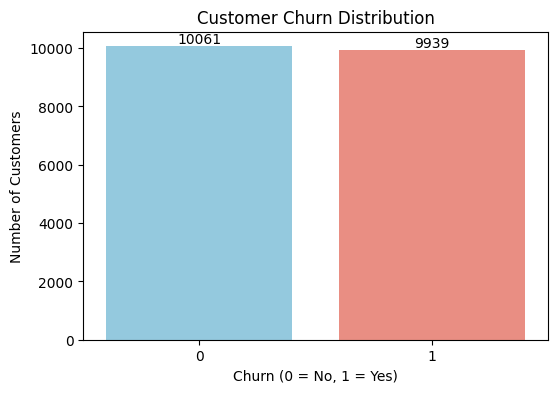

In [ ]:
import seaborn as sns

# Convert to Pandas if using PySpark
churn_pd = df_features.select("churn").toPandas()

plt.figure(figsize=(6,4))
sns.countplot(x="churn", data=churn_pd, palette=["skyblue", "salmon"])
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")

# Add counts on top of bars
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom')
plt.show()


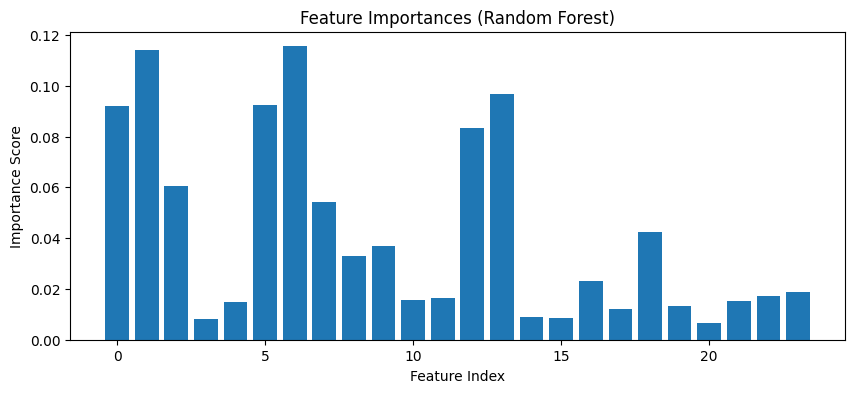

In [ ]:
rf_model = model.stages[-1]  # Random Forest from your pipeline
importances = rf_model.featureImportances

# Convert importances to Pandas-friendly list
importance_list = importances.toArray()

plt.figure(figsize=(10,4))
plt.bar(range(len(importance_list)), importance_list)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()


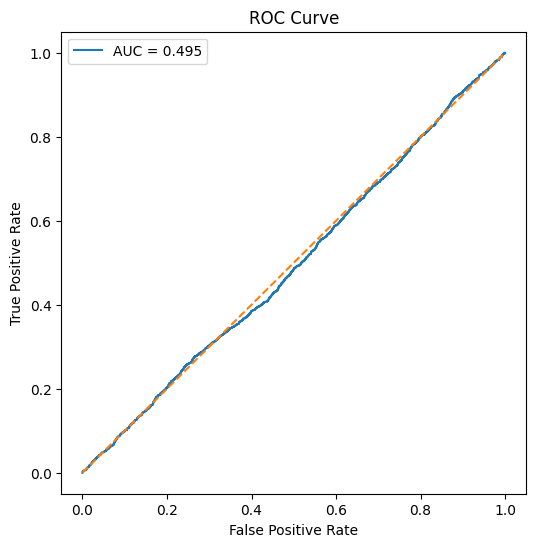

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.functions import vector_to_array
import numpy as np

# Convert Spark preds to Pandas
pred_pd = predictions.select("churn", "probability").toPandas()
pred_pd["prob1"] = pred_pd["probability"].apply(lambda x: float(x[1]))

from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(pred_pd["churn"], pred_pd["prob1"])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


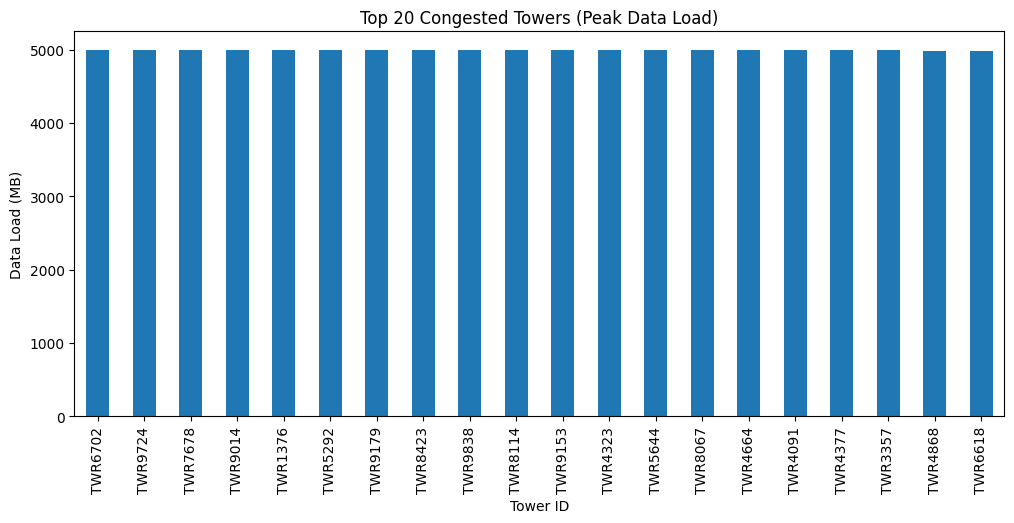

In [ ]:
network_pd = df_network.select("tower_id", "data_load_MB").toPandas()
tower_load = network_pd.groupby("tower_id")["data_load_MB"].max().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,5))
tower_load.plot(kind="bar")
plt.title("Top 20 Congested Towers (Peak Data Load)")
plt.ylabel("Data Load (MB)")
plt.xlabel("Tower ID")
plt.show()


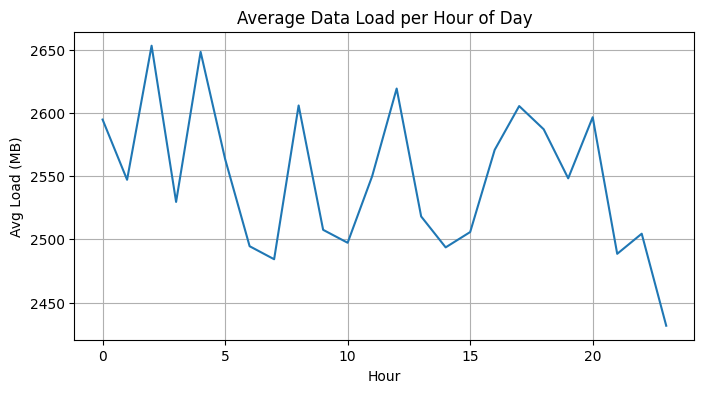

In [ ]:
from pyspark.sql.functions import hour

hourly_df = df_network.withColumn("hour", hour("timestamp"))
hourly_pd = hourly_df.groupBy("hour").avg("data_load_MB").orderBy("hour").toPandas()

plt.figure(figsize=(8,4))
plt.plot(hourly_pd["hour"], hourly_pd["avg(data_load_MB)"])
plt.title("Average Data Load per Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Avg Load (MB)")
plt.grid(True)
plt.show()


In [ ]:
import time

start = time.time()

rdd_result = df_cdr.rdd \
    .map(lambda row: (row["customer_id"], row["call_duration_seconds"])) \
    .reduceByKey(lambda a, b: a + b) \
    .collect()

end = time.time()
rdd_time = end - start
print("RDD Time:", rdd_time)


RDD Time: 4.802769660949707


In [ ]:
start = time.time()

df_result = df_cdr.groupBy("customer_id").sum("call_duration_seconds").collect()

end = time.time()
df_time = end - start
print("DataFrame Time:", df_time)


DataFrame Time: 1.0375514030456543


In [ ]:
df_cdr.createOrReplaceTempView("cdr_view")

start = time.time()

sql_result = spark.sql("""
    SELECT customer_id, SUM(call_duration_seconds) AS total_call_seconds
    FROM cdr_view
    GROUP BY customer_id
""").collect()

end = time.time()
sql_time = end - start
print("SQL Time:", sql_time)


SQL Time: 0.5840635299682617


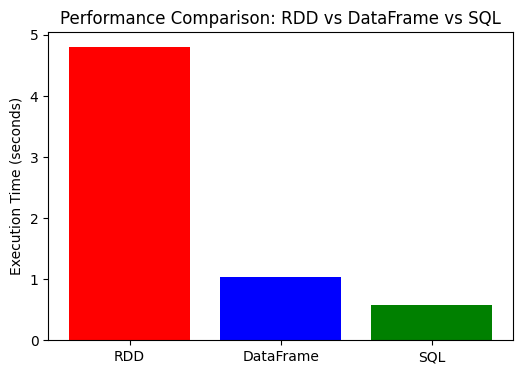

In [ ]:
import matplotlib.pyplot as plt

methods = ["RDD", "DataFrame", "SQL"]
times = [rdd_time, df_time, sql_time]

plt.figure(figsize=(6,4))
plt.bar(methods, times, color=["red","blue","green"])
plt.ylabel("Execution Time (seconds)")
plt.title("Performance Comparison: RDD vs DataFrame vs SQL")
plt.show()


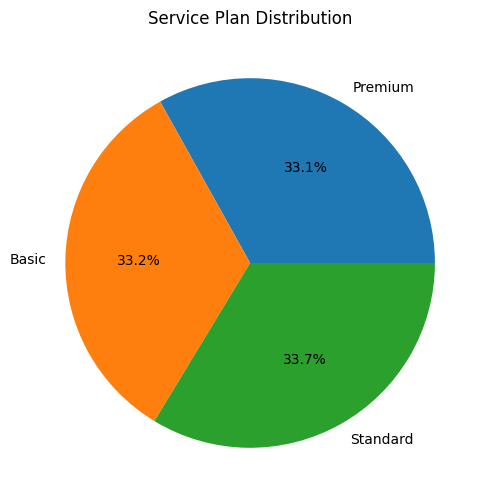

In [ ]:
plan_pd = df_customers.groupBy("service_plan").count().toPandas()

plt.figure(figsize=(6,6))
plt.pie(plan_pd["count"], labels=plan_pd["service_plan"], autopct="%1.1f%%")
plt.title("Service Plan Distribution")
plt.show()


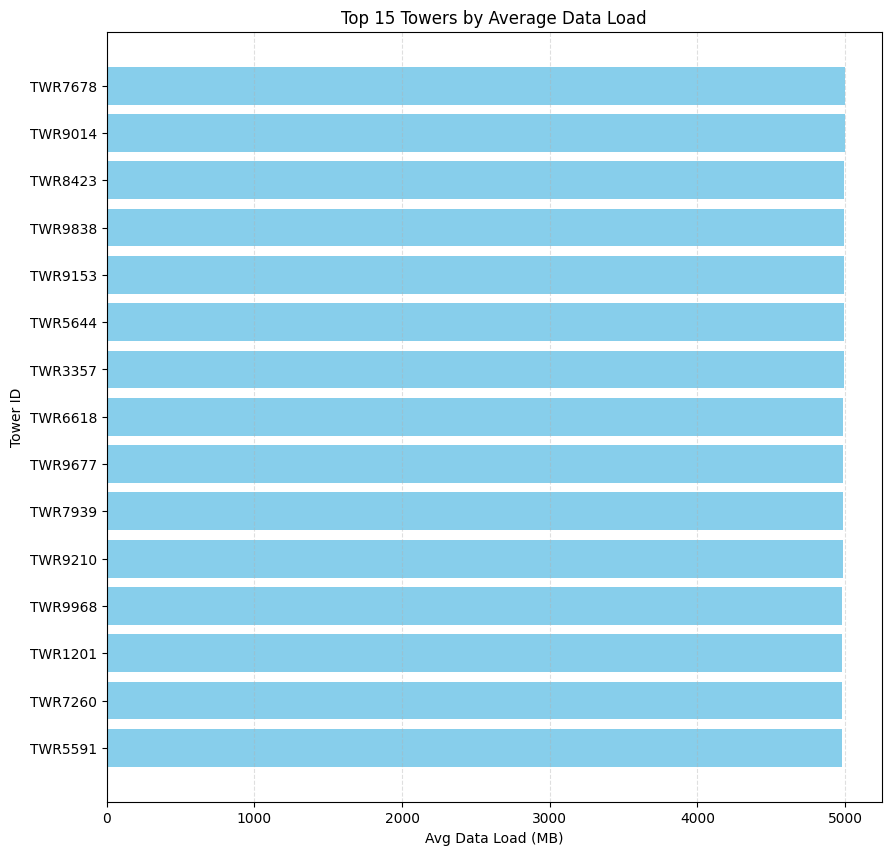

In [310]:
# Load all 4 CSVs
customers = spark.read.csv("customers.csv", header=True, inferSchema=True)
cdr = spark.read.csv("cdr.csv", header=True, inferSchema=True)
complaints = spark.read.csv("complaints.csv", header=True, inferSchema=True)
network = spark.read.csv("network_usage.csv", header=True, inferSchema=True)

# View 1 page (first 10 rows)
print("=== CUSTOMERS ===")
customers.show(10)

print("=== CDR ===")
cdr.show(10)

print("=== COMPLAINTS ===")
complaints.show(10)

print("=== NETWORK USAGE ===")
network.show(10)


=== CUSTOMERS ===
+-----------+----------+------------+----------+-------------+----------+-----+
|customer_id|  location|service_plan|data_usage|call_duration|complaints|churn|
+-----------+----------+------------+----------+-------------+----------+-----+
|     986083| Kathmandu|     Premium|       3.9|           60|         5|    1|
|     103565|    Dharan|       Basic|      9.18|          315|         3|    1|
|     151588|   Pokhara|    Standard|      5.37|          462|         1|    0|
|     428243|  Lalitpur|       Basic|      6.88|          554|         2|    0|
|     517690|Biratnagar|    Standard|      4.76|          456|         5|    0|
|     627419|Biratnagar|     Premium|      9.97|          398|         5|    1|
|     671413| Kathmandu|       Basic|      3.78|           63|         0|    0|
|     958352|    Dharan|       Basic|      5.14|          588|         0|    0|
|     387257|   Pokhara|       Basic|      5.17|          488|         5|    1|
|     121486|    Dhara